# Objective

* Per PI's request, this notebook explores correlations between EDA features and HRV features across participants/ time windows, replacing the prior stress-label-based modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
# Load preprocessed feature data
eda_df = pd.read_csv("C:/Users/lpnhu/Downloads/Stress_Testing_Analysis/preprocessing/eda_feature_matrix.csv")
hrv_df = pd.read_csv("C:/Users/lpnhu/Downloads/Stress_Testing_Analysis/preprocessing/hrv_feature_matrix.csv")

In [3]:
# Convert date columns to datetime for clean merge
eda_df['date'] = pd.to_datetime(eda_df['date'])
hrv_df['date'] = pd.to_datetime(hrv_df['date'])

# Merge on participant_id + date
merged_df = pd.merge(eda_df, hrv_df, on=['participant_id', 'date'])

print("Merged shape:", merged_df.shape)
merged_df.head()


Merged shape: (85, 4)


,date,eda_scl_usiemens,participant_id,prv_rmssd_ms
0,2023-12-24,99.9,1,NaN
1,2023-12-25,5.6,1,89.5
2,2023-12-26,27.2,1,97.8
3,2023-12-27,0.0,1,74.6
4,2023-12-28,6.5,1,92.0


In [4]:
# Count missing values
print("Missing values before imputation:")
print(merged_df.isna().sum())

# Impute using median for each feature column (grouped by participant if desired)
merged_df_imputed = merged_df.copy()
feature_cols = [col for col in merged_df.columns if col not in ['participant_id', 'date']]

# group-wise imputation by participant
for col in feature_cols:
    merged_df_imputed[col] = merged_df.groupby('participant_id')[col].transform(lambda x: x.fillna(x.median()))

print("\n Missing values after imputation:")
print(merged_df_imputed.isna().sum())

# Preview
merged_df_imputed.head()


Missing values before imputation:
date                0
eda_scl_usiemens    0
participant_id      0
prv_rmssd_ms        3
dtype: int64

 Missing values after imputation:
date                0
eda_scl_usiemens    0
participant_id      0
prv_rmssd_ms        0
dtype: int64


,date,eda_scl_usiemens,participant_id,prv_rmssd_ms
0,2023-12-24,99.9,1,91.5
1,2023-12-25,5.6,1,89.5
2,2023-12-26,27.2,1,97.8
3,2023-12-27,0.0,1,74.6
4,2023-12-28,6.5,1,92.0


In [5]:
# Check correlation between EDA and HRV
merged_df_imputed[['eda_scl_usiemens', 'prv_rmssd_ms']].corr()

,eda_scl_usiemens,prv_rmssd_ms
eda_scl_usiemens,1.0000,0.5316
prv_rmssd_ms,0.5316,1.0000


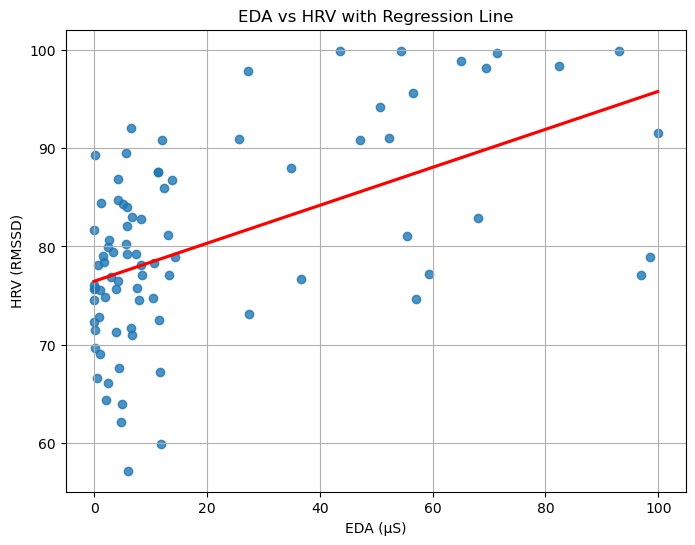

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(
    data=merged_df_imputed,
    x='eda_scl_usiemens',
    y='prv_rmssd_ms',
    scatter=True,
    ci=None,       
    line_kws={"color": "red"}
)

plt.title('EDA vs HRV with Regression Line')
plt.xlabel('EDA (μS)')
plt.ylabel('HRV (RMSSD)')
plt.grid(True)
plt.show()
